# Exploratory Analysis of Cost and Utilization Data, 2001 - 2016

### Overview of the Three Different Levels of Summarization

#### Event Level
The individual event level provides payers, costs, and utilization data at the most granular level. There's Event Level data for dental (DUE), facility (FAE), medical provider (MPE), inpatient hospital (IPE), outpatient hospital (OPE), instituitional events (IUE), and prescription medicine events (PME).

#### Person Summary Level  (PS)
Summarizes all payers and costs across service categories and summarizes type of service amounts. "These records show only one total for each person, service, and payer"

#### Service Summary Level (SS)  
Summarizes at the service level: dental, facility, home health, hospice, medical provider, inpatient hospital, institutional, OP hospital, and prescribed medicines. If we add up all the SS categories by person, we get the PS values.


*Note that PS and SS variables are summarized in two ways. (1) summarized from event records, (2) adjusted to compensate for Medicare covered days that were not covered by interview reference periods.*

### Data Wrangling

In [205]:
import pandas as pd

Convert Stata dta files into python data frames:

In [206]:
df_2001 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2001.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2002 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2002.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2003 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2003.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2004 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2004.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2005 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2005.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2006 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2006.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2007 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2007.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2008 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2008.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2009 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2009.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2010 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2010.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2011 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2011.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2012 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2012.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2013 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2013.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2015 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2015.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])
df_2016 = pd.read_stata('J:\Geriatrics\Geri\MCBSProject\Data\Master Files\MCBS_MASTER_2016.dta',columns = ['year', 'pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'])

#Learn how to loop in Python*

Append yearly data frames (aka vertically concatenating):

In [207]:
df = pd.concat([df_2001,df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2015, df_2016], sort = True)

Tabulate number of Medicare Beneficiaries by year:

In [208]:
df['year'].value_counts(sort = False)

2001.0    17931
2002.0    17739
2003.0    17428
2004.0    16994
2005.0    17095
2006.0    17561
2007.0    18066
2008.0    15777
2009.0    15946
2010.0    16079
2011.0    16331
2012.0    16454
2013.0    16174
2015.0    14068
2016.0    14778
Name: year, dtype: int64

Aggregate expenses by year:

In [209]:
df_agg = df.groupby('year')['pamtcaid', 'pamtcare', 'pamtoop', 'pamthp', 'pamttot'].sum()

In [210]:
df_renamed = df_agg.rename(columns={"pamtcaid": "Medicaid", "pamtcare": "Medicare", "pamtoop": "Out-of-pocket", 'pamthp': 'Hospice', 'pamttot': 'Total Payments'})
df_renamed.head(15)

,Medicaid,Medicare,Out-of-pocket,Hospice,Total Payments
year,,,,,
2001.0,25801959.83,6.617137e+07,32427593.66,1497622.00,1.577664e+08
2002.0,24781234.29,7.266633e+07,32767338.11,1798149.00,1.653949e+08
2003.0,23612135.95,7.543495e+07,33297818.92,2106381.00,1.657107e+08
2004.0,24950294.40,7.887197e+07,33059816.44,2495619.00,1.706724e+08
2005.0,27682469.48,8.212589e+07,33390803.54,2704711.00,1.804134e+08
2006.0,23008380.02,9.393004e+07,34638652.06,3233805.00,1.892037e+08
2007.0,22978786.00,1.010042e+08,35520596.40,3131986.00,1.965307e+08
2008.0,22797479.10,1.001328e+08,33046755.49,3716489.00,1.949927e+08
2009.0,20162192.72,9.504289e+07,30368659.29,3570999.00,1.799208e+08


### Time-series Line Plot 

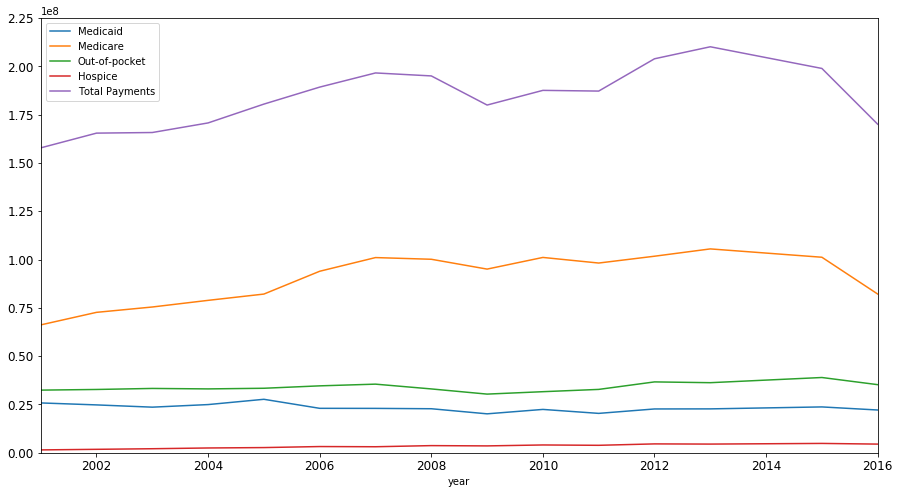

In [224]:
df_renamed.plot(
    kind = 'line',
    figsize=(15,8),
    fontsize=12,
    ylim=(0,225000000)
    )
    